### <span style="color: rgb(96, 157, 179);">**Predicting Purchase Likelihood for Better Conversion Rates at MarketGenix**</span>

##### **<span style= "color: rgb(171, 211, 226);"> Objective </span>**  
At MarketGenix, the business goal for 2025 is to increase conversions by targeting leads with high purchase potential.  
As a data scientist, I was onboarded to contribute to this mission by building a predictive model that analyzes Google Analytics data and forecasts purchase likelihood.


##### **<span style= "color: rgb(171, 211, 226);"> Key Features </span>**  
The model utilizes the following dimensions:  
    **Engagement Metrics**: `Engagement_Level`, `Likes`, `Shares`, `Comments`, `Clicks`, `Time_Spent_on_Platform`. **Behavioral Insights**: `Engagement_with_Ads`, `Purchase_History`. **Outcome**: `Purchase_Likelihood`.


---


### **<span style= "color: rgb(77, 149, 175);"> Analyses </span>**  

<img src="Images\pexels-photo-590020.webp" alt="Image description" width="width_in_pixels" height="height_in_pixels" />


##### **<span style= "color: rgb(171, 211, 226);"> Workflow Overview </span>**  

1. **<span style= "color: rgb(132, 158, 167);"> Preprocessing </span>**:  
   - Drop irrelevant fields, handle missing values, encode categorical data, and assess feature correlations.  

2. **<span style= "color: rgb(132, 158, 167);"> Polynomial Regression </span>**:  
   - Apply if features are insufficient or non-linear, choosing a degree that balances overfitting and underfitting.  

3. **<span style= "color: rgb(132, 158, 167);"> Scaling </span>**:  
   - Standardize features to ensure uniform treatment of variables with different scales.  

4. **<span style= "color:rgb(132, 158, 167);"> Model Selection </span>**:
   - Choose based on data:  
     - **Linear Regression**: Simple linear relationships.  
     - **RidgeCV (L2)**:  To perform ___feature shrinkage___.<span style= "color:rgb(115, 122, 141);"> High alpha values reduce overfitting (_high variance_)</span> but may lead to underfitting (_high bias_) if too high. <span style= "color:rgb(115, 122, 141);"> Low alpha values reduce the penalty, risking overfitting by fitting noise</span>. Cross-validation (CV) helps find a balance between high variance and high bias using multiple alpha values.
     - **LassoCV (L1)**: To perform ___feature selection___  by shrinking some coefficients to zero, _enabling sparse models_. <span style= "color:rgb(115, 122, 141);"> High alpha can eliminate relevant features (_underfiting/high bias_)</span>, while <span style= "color:rgb(115, 122, 141);">low alpha may allow irrelevant features, leading to overfitting (_high variance_).</span>
    
 
5. **<span style = "color:rgb(132, 158, 167);"> Evaluation </span>**:  
   - Assess performance using RMSE to identify the best model.  

6. **<span style = "color:rgb(132, 158, 167);"> Conclusion </span>**:  
   - Draw actionable insights aligned with business goals.  

----

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

#### **<span style= "color: rgb(171, 211, 226);"> Data Reading and Preprocessing </span>**  


In [247]:
df = pd.read_csv(r'./marketing_data new.csv')
df.head()

,User_ID,Engagement_Level,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy
0,2,High,"8,413,654,618,473,890","4,824,120,603,015,070","0,53","0,74","4,666,666,666,666,660","697,986,577,181,208",0,1,0,"5,733,867,342,978,630"
1,4,High,"6,987,951,807,228,910","2,914,572,864,321,600","0,27","0,76","0,5","8,859,060,402,684,560",0,1,0,0
2,8,High,"6,084,337,349,397,580","42,713,567,839,195,900","0,84","0,92","6,333,333,333,333,330","6,778,523,489,932,880",1,0,"7,045,884,279,284,790","7,096,161,971,300,210"
3,13,High,"6,305,220,883,534,130","7,537,688,442,211,050","7,000,000,000,000,000","0,18","16,666,666,666,666,600","1,342,281,879,194,630",1,0,0,"5,160,008,998,865,630"
4,14,High,"28,112,449,799,196,700","9,798,994,974,874,370","0,27","0,34","13,333,333,333,333,300","60,402,684,563,758,300",1,1,0,"577,341,669,064,506"


_<span style= "color: rgb(102, 186, 192);"> The `user_ID` column is removed because it does not contribute meaningful information to the model. It serves merely as a placeholder and does not impact the predictive power of the model</span>_.

In [248]:
df.drop(['User_ID'], axis=1, inplace=True)



_<span style= "color: rgb(102, 186, 192);"> I need to encode the `Engagement_Level` field, but first, I will convert all the data types to their appropriate formats</span>_.

In [249]:
df.dtypes
df = df.convert_dtypes()
df.dtypes

# not helping because only engagement_level should be an object

Engagement_Level          string
Likes                     string
Shares                    string
Comments                  string
Clicks                    string
Engagement_with_Ads       string
Time_Spent_on_Platform    string
Purchase_History           Int64
Purchase_Likelihood        Int64
brand                     string
buy                       string
dtype: object

In [250]:
df['Purchase_History'].nunique()
df['Purchase_Likelihood'].nunique()

# there'd be no need to work on these columns; they only contain 2 unique binary values (1, 0)

2

_<span style= "color: rgb(102, 186, 192);"> To ensure the fields are completely clean and not still identified as strings; abnormal charcaters would be worked on alongside the datatype format</span>_.

In [251]:
column_to_float = ['Likes', 'Shares', 'Comments', 'Clicks',
       'Engagement_with_Ads', 'Time_Spent_on_Platform', 'brand', 'buy']

for column in column_to_float:
    df[column] = df[column].astype(str).str.strip().replace(r'[\n\t\r, !()* $%#@&'']', '', regex = True).astype(float)

    df[column] = pd.to_numeric(df[column], errors='coerce')


# I am converting to float because floats datatypes are accommodative of integers but not vice-versa.

__<span style= "color: rgb(105, 207, 233);">Check for missing values</span>__

In [252]:
df.isnull().sum()

# here are no nulll values

Engagement_Level          0
Likes                     0
Shares                    0
Comments                  0
Clicks                    0
Engagement_with_Ads       0
Time_Spent_on_Platform    0
Purchase_History          0
Purchase_Likelihood       0
brand                     0
buy                       0
dtype: int64

In [253]:
df.dtypes

Engagement_Level           string
Likes                     float64
Shares                    float64
Comments                  float64
Clicks                    float64
Engagement_with_Ads       float64
Time_Spent_on_Platform    float64
Purchase_History            Int64
Purchase_Likelihood         Int64
brand                     float64
buy                       float64
dtype: object

**<span style= "color: rgb(105, 207, 233);"> Encode the string values in the `Engagement_Level` field</span>**

In [254]:
pd_dummies = pd.get_dummies(df['Engagement_Level'], drop_first=True)
df = pd.concat([df, pd_dummies], axis = 1)
df.drop('Engagement_Level', axis = 1, inplace = True)
df

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,Low,Medium
0,8.413655e+15,4.824121e+15,5.300000e+01,74.0,4.666667e+15,6.979866e+14,0,1,0.000000e+00,5.733867e+15,0,0
1,6.987952e+15,2.914573e+15,2.700000e+01,76.0,5.000000e+00,8.859060e+15,0,1,0.000000e+00,0.000000e+00,0,0
2,6.084337e+15,4.271357e+16,8.400000e+01,92.0,6.333333e+15,6.778523e+15,1,0,7.045884e+15,7.096162e+15,0,0
3,6.305221e+15,7.537688e+15,7.000000e+15,18.0,1.666667e+16,1.342282e+15,1,0,0.000000e+00,5.160009e+15,0,0
4,2.811245e+16,9.798995e+15,2.700000e+01,34.0,1.333333e+16,6.040268e+16,1,1,0.000000e+00,5.773417e+14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.016064e+15,2.914573e+15,2.600000e+01,1.0,7.333333e+15,8.120805e+15,0,1,0.000000e+00,8.341608e+15,0,1
496,4.759036e+15,1.507538e+15,3.100000e+01,2.0,8.000000e+00,4.161074e+15,0,0,0.000000e+00,0.000000e+00,0,1
497,5.040161e+14,9.497487e+14,5.600000e+01,98.0,5.000000e+00,2.684564e+16,0,1,6.914343e+15,0.000000e+00,0,1
498,0.000000e+00,7.587940e+15,8.000000e+00,96.0,9.333333e+15,7.651007e+15,0,0,0.000000e+00,0.000000e+00,0,1


In [255]:
df.dtypes

Likes                     float64
Shares                    float64
Comments                  float64
Clicks                    float64
Engagement_with_Ads       float64
Time_Spent_on_Platform    float64
Purchase_History            Int64
Purchase_Likelihood         Int64
brand                     float64
buy                       float64
Low                         uint8
Medium                      uint8
dtype: object

#### **<span style= "color: rgb(171, 211, 226);"> Exploratory Data Analysis </span>**  


_<span style= "color: rgb(102, 186, 192);"> To understand the relationship between the variables and spot if there is any multicolinearity that could cause high variance in the model</span>._

In [256]:
corr_mat = df.corr()
corr_mat

,Likes,Shares,Comments,Clicks,Engagement_with_Ads,Time_Spent_on_Platform,Purchase_History,Purchase_Likelihood,brand,buy,Low,Medium
Likes,1.000000,0.012489,-0.043565,-0.080249,0.032280,-0.064047,0.048032,0.012350,0.069659,0.039120,-0.053425,0.036053
Shares,0.012489,1.000000,-0.054251,0.030450,-0.006023,-0.019129,-0.036231,-0.027609,-0.047083,-0.001329,-0.000775,-0.034036
Comments,-0.043565,-0.054251,1.000000,0.045243,0.024012,0.096088,0.075851,0.006570,-0.039957,0.069356,-0.098464,-0.009389
Clicks,-0.080249,0.030450,0.045243,1.000000,-0.044810,-0.032386,0.037863,0.009994,-0.030072,-0.052657,-0.011963,0.005180
Engagement_with_Ads,0.032280,-0.006023,0.024012,-0.044810,1.000000,0.022453,0.012980,0.074005,0.083682,0.002713,-0.058099,0.005933
Time_Spent_on_Platform,-0.064047,-0.019129,0.096088,-0.032386,0.022453,1.000000,-0.043075,-0.003473,-0.011980,0.004238,-0.027584,0.038507
Purchase_History,0.048032,-0.036231,0.075851,0.037863,0.012980,-0.043075,1.000000,0.012484,-0.030177,-0.011794,-0.014484,0.055922
Purchase_Likelihood,0.012350,-0.027609,0.006570,0.009994,0.074005,-0.003473,0.012484,1.000000,-0.001703,-0.038627,0.040131,-0.036875
brand,0.069659,-0.047083,-0.039957,-0.030072,0.083682,-0.011980,-0.030177,-0.001703,1.000000,0.223111,-0.069648,-0.001009
buy,0.039120,-0.001329,0.069356,-0.052657,0.002713,0.004238,-0.011794,-0.038627,0.223111,1.000000,-0.026054,0.050485


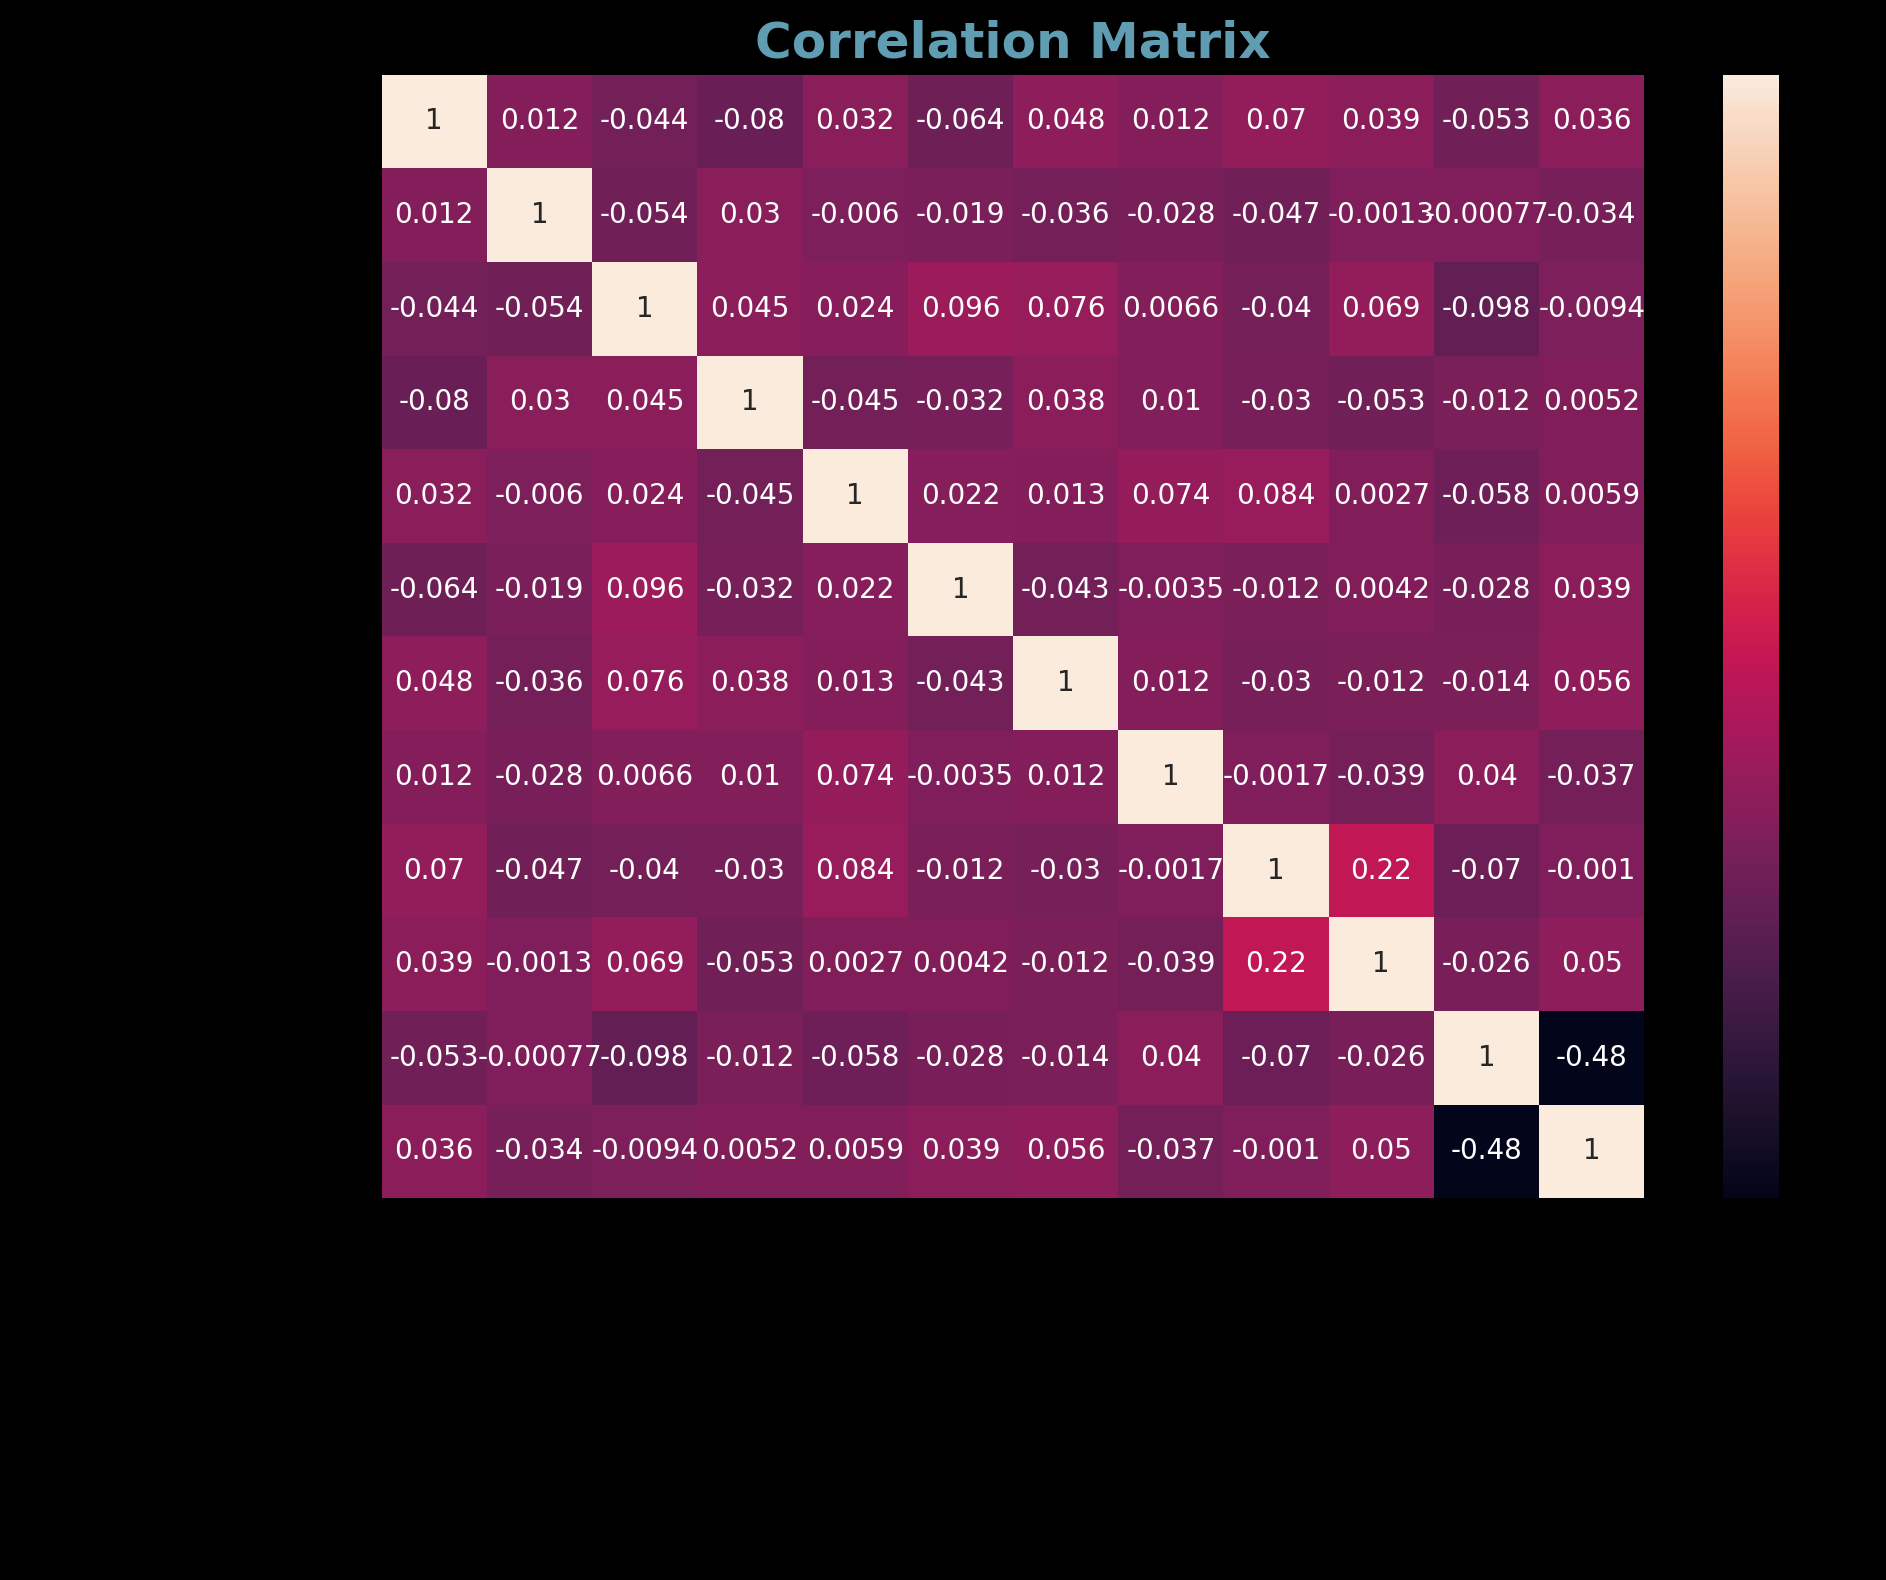

In [257]:
plt.figure(figsize =(10, 8), dpi = 200, clear=True, facecolor='BLACK', edgecolor='Red',frameon=True)

sns.heatmap(corr_mat, annot=True)

plt.title(label='Correlation Matrix', loc='center', fontsize=18, fontweight='bold', color=(96/255, 157/255, 179/255))

plt.tight_layout();

- **Positive Correlations**:  
  From the heatmap, **Engagement_with_Ads** has the highest positive correlation with the target variable, `Purchase_Likelihood`, followed by **Likes**, **Purchase_History**, and **Clicks**. This indicates that these engagement metrics are strong predictors of purchase likelihood.  

- **Negative Correlations**:  
  - **Time_Spent_on_Platform** and **Previous_Buy_Frequency** show an inverse relationship with `Purchase_Likelihood`, meaning the less time spent on the platform or the lower the buy frequency, the higher the likelihood of purchase. This finding may seem counterintuitive, as one might expect higher engagement or frequent purchases to correlate positively.  
  - **Shares** also exhibit a negative correlation with purchase likelihood. This might suggest that users share content when they are not personally interested in buying, while those planning to purchase engage less in sharing.  
  - **Time_Spent_on_Platform** has a minimal inverse correlation with the target, implying it is not a significant predictor.  

- **Multicollinearity Observations**:  
  - **Brand** and **Engagement_with_Ads** have a strong positive correlation, suggesting that people engage with ads based on their affinity for specific brands.  
  - **Time_Spent_on_Platform** is highly correlated with **Comments**, indicating that users tend to stay longer on the platform to interact through comments. To increase time spent, strategies such as promoting engaging content, fostering discussions, or encouraging user comments (e.g., via giveaways or interactive posts) could be effective.  
  - **Purchase_History** shows a strong correlation with **Likes** and **Comments**, indicating that users tend to validate a product's authenticity by engaging with these features. Alternatively, users who haven't engaged may rely on likes and comments to make purchasing decisions.  
  - Additional correlations include **Clicks** and **Comments**, as well as **Brand** and **Likes**, emphasizing the interconnected nature of user behaviors and brand engagement.  

**<span style= "color: rgb(105, 207, 233);"> Check if the data is unbalanced</span>**

In [258]:
df['Purchase_Likelihood'].value_counts()

# relatively balanced. There might not be the neeed for stratify argument in the tain test split

1    251
0    249
Name: Purchase_Likelihood, dtype: Int64

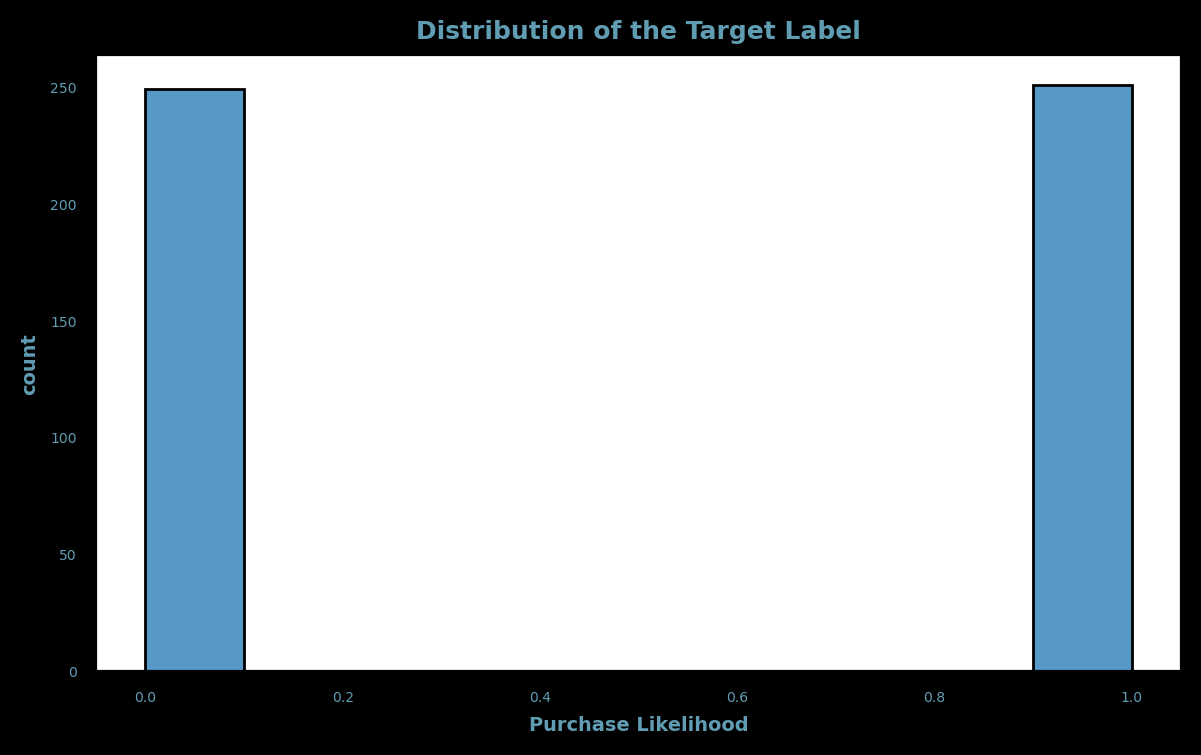

In [259]:
plt.figure(figsize =(7, 4), dpi = 200, clear=True, facecolor='black', edgecolor='Red',frameon=True)
sns.histplot(data = df, x='Purchase_Likelihood')

plt.xlabel('Purchase Likelihood', fontweight='bold', color=(96/255, 157/255, 179/255), fontsize=7)
plt.xticks(color=(96/255, 157/255, 179/255), fontsize=5)

plt.yticks(color=(96/255, 157/255, 179/255), fontsize=5)
plt.ylabel('count', fontweight='bold', color=(96/255, 157/255, 179/255), fontsize=7)

plt.title('Distribution of the Target Label', fontsize=9, fontweight='bold', color=(96/255, 157/255, 179/255));

_<span style= "color: rgb(102, 186, 192);"> Fairly balanced data, so there'd be no need to use the stratify argument for the y label in the traintestsplit</span>_

#### **<span style= "color: rgb(171, 211, 226);"> Model Development </span>**  


**<span style= "color: rgb(105, 207, 233);">  Scale the input features</span>**

In [260]:
X = df.drop('Purchase_Likelihood', axis = 1)
y = df['Purchase_Likelihood']

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29, shuffle = True)

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

_<span style= "color: rgb(102, 186, 192);"> Using RidgeCV simply because there are many features with varying weight of impact on the target label. L2 will shrink the feature coefficients proportionally to their impact on the target label, while addressing multicollinearity and reducing high variance.</span.>._

In [263]:
from sklearn.metrics import SCORERS
SCORERS.keys()

# to get the acurate name of the scorer metric

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

**<span style= "color: rgb(105, 207, 233);"> RidgeCV </span>**

In [264]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
alphas = [0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]
model = RidgeCV(alphas=alphas, cv = 5,scoring= 'neg_mean_squared_error')
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)

print('The RMSE vaule:', RMSE)
print('The MAE value:', MAE)
print('Best score is :' , model.best_score_)
print('best cofficent value is :', model.coef_)
print('the model\'s intercept is: ', model.intercept_)

# 1000 is oo wide for an alpha-meanse he loss or penaly loss value is so high, he alpha needed is high o minimize he coefficien...high alphas may 
# resul in high varaince.
# o resolve his, would chec if PCA is able o reasnalbly reduce he dimensions- before checing eirhr Lasso (Feaure shrinagecv) or elasicnecv

The RMSE vaule: 0.5066390581560328
The MAE value: 0.5053077975012429
Best score is : -0.25323650895927036
best cofficent value is : [-0.00695296  0.00088684  0.00427177  0.00763024  0.00797207  0.00260152
 -0.00484963 -0.00384796 -0.01247727  0.00172611 -0.00479239]
the model's intercept is:  0.5228571428571429


_<span style= "color: rgb(102, 186, 192);"> From the above, the LinAlgWarning (surpressed)  indicates that the model's accuracy is compromised due to the high multicollinearity among the dimensions in the data. To address this, use PCA to reduce the dimensionality by focusing on the principal components and capturing the variance effectively.</span>._

----

In [265]:
# Carry out PCA since standardizaton has been done. 

from sklearn.decomposition import PCA

pca = PCA(n_components=4)
# Choosing to retain 4 components as the correlation matrix showed 4 main variable dependecies of the target label


scaled_x_train_pca = pca.fit_transform(scaled_X_train)
scaled_x_test_pca = pca.transform(scaled_X_test)


**<span style= "color: rgb(105, 207, 233);"> Data Dimension Check </span>**

In [266]:
scaled_X_train.shape

(350, 11)

In [267]:
scaled_x_test_pca.shape

(150, 4)

In [268]:
scaled_x_test_pca.shape

(150, 4)

**<span style= "color: rgb(105, 207, 233);"> RidgeCV on scaled PCA variables </span>**

In [269]:
alphas = [0.1, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]
model2 = RidgeCV(alphas=alphas, cv = 5,scoring= 'neg_mean_squared_error')
model2.fit(scaled_x_train_pca, y_train)
y_pred2 = model2.predict(scaled_x_test_pca)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred2))
MAE = mean_absolute_error(y_test, y_pred2)

print('The RMSE vaule:', RMSE)
print('The MAE value:', MAE)
print('Best Alpha value:', model2.alpha_)
print('Best score is :' , model2.best_score_)
print('best cofficent value is :', model2.coef_)
print('the model\'s intercept is: ', model2.intercept_)

The RMSE vaule: 0.5060984271904971
The MAE value: 0.5053594697304391
Best Alpha value: 1000.0
Best score is : -0.25337564144927127
best cofficent value is : [-0.00705935  0.00713135 -0.00511153  0.0051919 ]
the model's intercept is:  0.5228571428571429


----

**<span style= "color: rgb(105, 207, 233);"> LassoCV </span>**

In [270]:
#  would use the entire scaled 9without PCA on Lasso, since it'd perform feature selction on its own

from sklearn.linear_model import LassoCV

alphas = [0.1, 0.4, .5, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]
# alphas=np.logspace(-6,6, 100)
model3 = LassoCV(alphas=alphas, cv = 5, max_iter=10000)
model3.fit(scaled_X_train, y_train)
y_pred3 = model3.predict(scaled_X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred3))
MAE = mean_absolute_error(y_test, y_pred3)

print('The RMSE vaule:', RMSE)
print('The MAE value:', MAE)
print('Best Alpha value:', model3.alpha_)
print('Best score is :' , model3.score(scaled_X_test, y_test))
print('best cofficent value is :', model3.coef_)
print('the model\'s intercept is: ', model3.intercept_)

The RMSE vaule: 0.5026487663497496
The MAE value: 0.5021333333333333
Best Alpha value: 1000.0
Best score is : -0.019504143120663286
best cofficent value is : [-0.  0.  0.  0.  0.  0. -0. -0. -0.  0. -0.]
the model's intercept is:  0.5228571428571429


-----

**<span style= "color: rgb(105, 207, 233);"> ElasticNetCV </span>**

In [271]:
from sklearn.linear_model import ElasticNetCV

l1_raio = [.1, .2, .4, .10, .95, .40, 1]
model4 = ElasticNetCV(l1_ratio=l1_raio, eps=0.001, max_iter= 1000000, n_alphas=100, fit_intercept=True, cv = 5)
model4.fit(scaled_X_train, y_train)
y_pred4 = model4.predict(scaled_X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred4))
MAE = mean_absolute_error(y_test, y_pred4)

print('The RMSE vaule:', RMSE)
print('The MAE value:', MAE)
print('the l1 ratio:', l1_raio)
print('Number of features seen during fit:', model4.n_features_in_)
print('Best Alpha value:', model4.alpha_)
print('Best score is :' , model4.score(scaled_X_test, y_test))
print('best cofficent value is :', model4.coef_)
print('the model\'s intercept is: ', model4.intercept_)

The RMSE vaule: 0.5028323150913911
The MAE value: 0.5023203058012966
the l1 ratio: [0.1, 0.2, 0.4, 0.1, 0.95, 0.4, 1]
Number of features seen during fit: 11
Best Alpha value: 0.45168594693787883
Best score is : -0.020248849489559184
best cofficent value is : [-0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.00232077  0.         -0.        ]
the model's intercept is:  0.5228571428571429


---
#### **<span style= "color: rgb(171, 211, 226);"> Model Deployment </span>**  


In [272]:

alphas = [0.1, .4, .5, 0.01, 0.001, 1.0, 10.0, 100.0, 1000]
model3 = LassoCV(alphas=alphas, cv = 5, max_iter=10000)
model3.fit(X, y)



c:\Users\Teni\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27294714759935346, tolerance: 0.009997750000000001
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Teni\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11279958650790434, tolerance: 0.009997750000000001
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Teni\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.453733550381685, tolerance: 0.009997750000000001
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Teni\anaconda3\New folder\lib\site-packag

LassoCV(alphas=[0.1, 0.4, 0.5, 0.01, 0.001, 1.0, 10.0, 100.0, 1000], cv=5,
        max_iter=10000)

In [273]:
from joblib import dump, load
dump(model3, 'marketing_lasso_model.jobib')

# loaded_model = load('marketing_lasso_model')

['marketing_lasso_model.jobib']

-----

#### **<span style= "color: rgb(171, 211, 226);"> Conclusion </span>**  


<img src="Images\pexels-photo-7947846.jpg" alt="Image description" width="width_in_pixels" height="height_in_pixels" />


Although the changes in the error values are not highly significant, LassoCV performed the best. In the ElasticNetCV, Lasso was more heavily utilized than Ridge. Although the alpha value leaned more towards 0 (suggesting an L2 penalty), the coefficients indicate otherwise.

Due to the sparsity in the coefficients, Lasso (L1 regularization) was chosen.

- **<span style= "color:rgb(132, 158, 167);"> Results</span>**:
    - <span style= "color:rgb(132, 158, 167);"> RidgeCV</span>:
        - RMSE: 0.5066
        - MAE: 0.5053
    - <span style= "color:rgb(132, 158, 167);"> RidgeCV with scaled PCA</span>:
        - RMSE: 0.5061
        - MAE: 0.5054
    -  <span style= "color:rgb(132, 158, 167);">LassoCV</span>:
        - RMSE: 0.5026
        - MAE: 0.5021
    -  <span style= "color:rgb(132, 158, 167);">ElasticNetCV</span>:
        - RMSE: 0.5028
        - MAE: 0.5023
        - L1 ratio: [0.1, 0.2, 0.4, 0.1, 0.95, 0.4, 1]
        - Number of features during fit: 11
        - Best alpha: 0.4517
        - Best score: -0.0202
        - Best coefficient values: [-0. 0. 0. 0. 0. 0. -0. -0. -0.0023 0. -0.]
        - Model intercept: 0.5229

- **<span style= "color:rgb(132, 158, 167);"> Insights</span>**:
  - LassoCV was largely favored in ElasticNet due to the sparse coefficient values of 0. Even though the alpha used in ElasticNet was 0.4 (closer to L2 regularization), the coefficients suggest that Lasso was predominantly used. While the RMSE values for all models were similar, LassoCV performed slightly better with an alpha of 1000.